# Day 53 – MNIST Digit Recognition (Portfolio-Ready)

## Project Overview
This project builds a neural network using TensorFlow and Keras to classify handwritten digits from the MNIST dataset.
It includes data preprocessing, model building, training, evaluation, and visualization of predictions.

## Dataset
- MNIST handwritten digits
- Images: 28x28 pixels (grayscale)
- Classes: 0–9

## Objective
- Build a portfolio-ready end-to-end digit recognition project
- Train a neural network with proper activations and loss
- Evaluate performance on unseen test data
- Visualize predictions for sample images


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


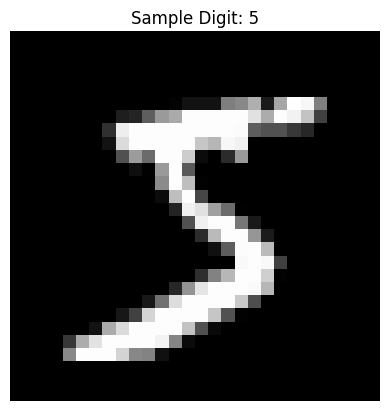

In [1]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Visualize a sample
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Sample Digit: {y_train[0]}")
plt.axis('off')
plt.show()


## Data Preprocessing
- Flatten 28x28 images → 784 features
- Normalize pixel values to range 0–1
- Labels remain as integers for sparse categorical crossentropy


In [2]:
# Flatten and normalize images
X_train = X_train.reshape(-1, 784).astype("float32") / 255.0
X_test = X_test.reshape(-1, 784).astype("float32") / 255.0


## Neural Network Architecture
- Input layer: 784 neurons (flattened image)
- Hidden layer 1: 128 neurons, ReLU activation
- Hidden layer 2: 64 neurons, ReLU activation
- Output layer: 10 neurons, Softmax activation

### Training Parameters
- Optimizer: Adam
- Loss: Sparse Categorical Crossentropy
- Epochs: 20
- Batch size: 32
- Validation split: 0.2


In [3]:
# Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Model Training
- Train for 20 epochs
- Batch size 32
- Validation split 0.2
- Monitor training and validation accuracy and loss


In [4]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8630 - loss: 0.4692 - val_accuracy: 0.9528 - val_loss: 0.1521
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9631 - loss: 0.1242 - val_accuracy: 0.9662 - val_loss: 0.1127
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9754 - loss: 0.0779 - val_accuracy: 0.9705 - val_loss: 0.0999
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9834 - loss: 0.0535 - val_accuracy: 0.9747 - val_loss: 0.0866
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9861 - loss: 0.0425 - val_accuracy: 0.9731 - val_loss: 0.0970
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9893 - loss: 0.0339 - val_accuracy: 0.9737 - val_loss: 0.0987
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9908 - loss: 0.0267 - val_accuracy: 0.9739 - val_loss: 0.1004
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9931 - loss: 0.0205 -

## Training & Validation Performance
- Plot accuracy and loss over epochs
- Detect overfitting or underfitting


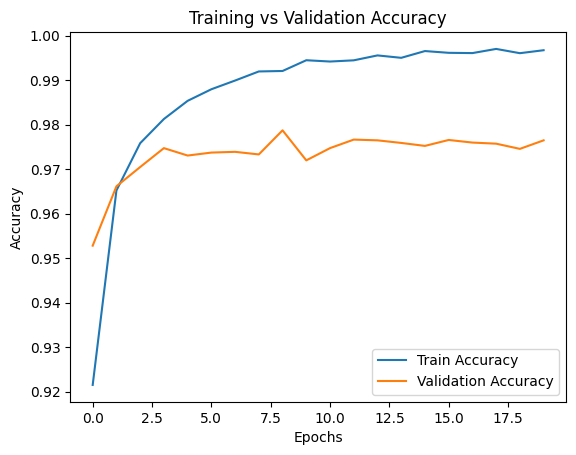

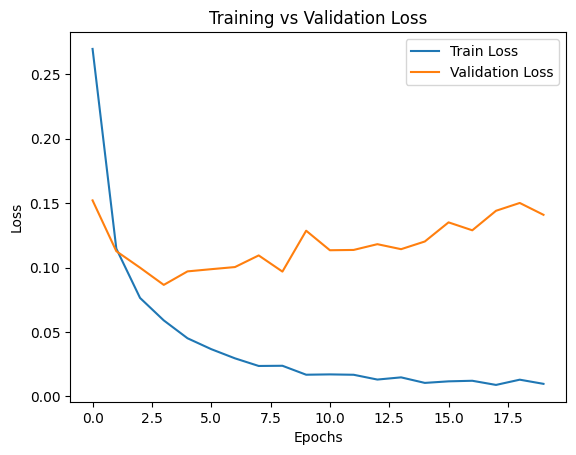

In [5]:
# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Model Evaluation
- Evaluate model on unseen test data
- Obtain final test accuracy


In [6]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Final Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9751 - loss: 0.1200
Final Test Accuracy: 0.9779999852180481


## Predictions & Sample Visualization
- Predict labels for first 10 test images
- Compare predicted vs true labels
- Visualize results with matplotlib


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


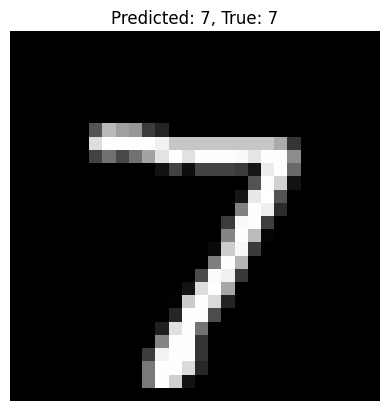

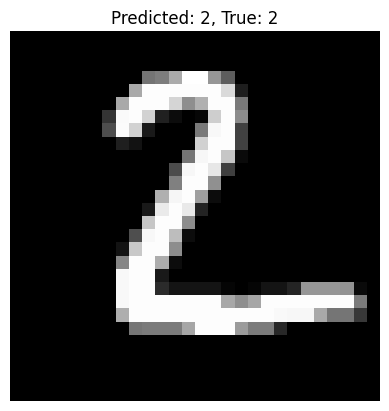

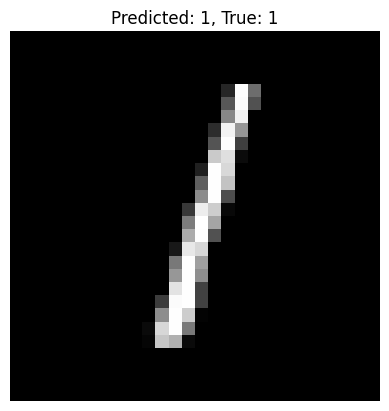

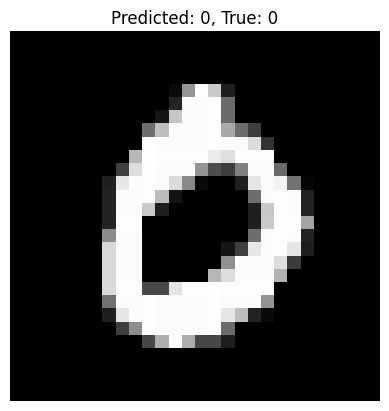

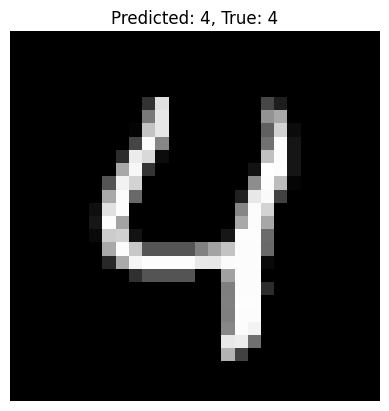

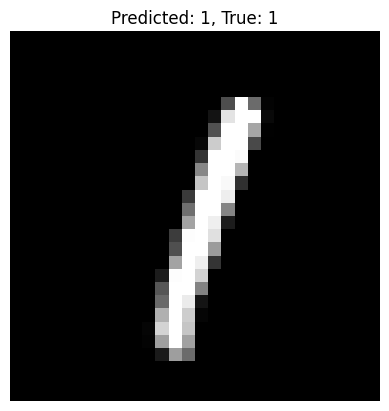

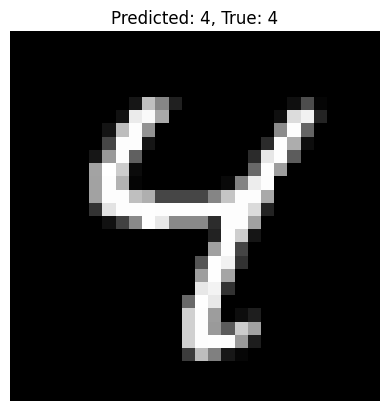

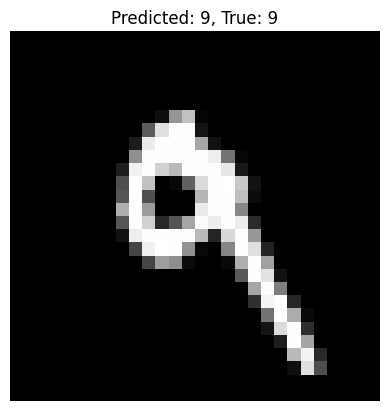

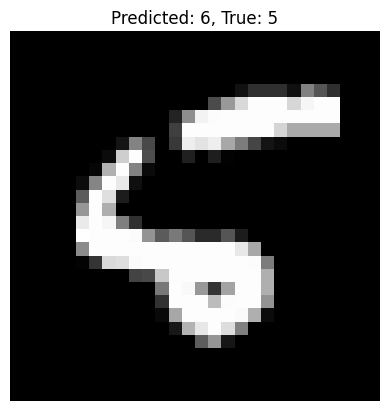

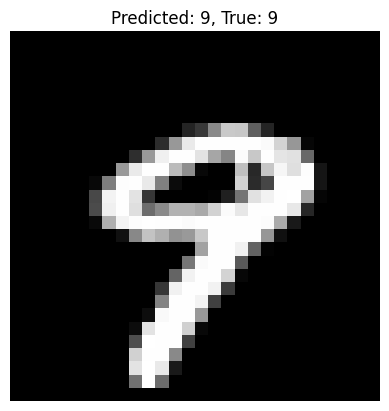

In [7]:
# Predict first 10 test images
predictions = model.predict(X_test[:10])
predicted_labels = np.argmax(predictions, axis=1)

# Visualize predictions
for i in range(10):
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}, True: {y_test[i]}")
    plt.axis('off')
    plt.show()


## Key Learnings
- Neural networks can classify handwritten digits with ~95%+ accuracy
- Flattening images is required for dense layers
- ReLU prevents vanishing gradient in hidden layers
- Softmax + Sparse Categorical Crossentropy is essential for multi-class classification
- Visualization of predictions is important for portfolio demonstration
